In [1]:
import datetime
import pandas as pd

from functions import Util

# Disable warning
pd.options.mode.chained_assignment = None 

level = 'andamento-nazionale'
path_data = './data'
path_csv = path_data + '/csv'
file_name_out_n = path_csv + '/covid19-nazione.csv'

In [2]:
url_cum = Util.get_url_cum(level)
url_cum

'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'

In [3]:
df_n_raw = pd.read_csv(url_cum)
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
# Define date threshold
days = 30
date_threshold = Util.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str

'2020-09-08T00:00:00'

In [4]:
df_nf = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_nf

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-09-08T17:00:00,ITA,1760,143,1903,31886,33789,796,1370,210801,35563,233555.0,46598.0,280153,9364213,5636663.0,NaN
1,2020-09-09T17:00:00,ITA,1778,150,1928,32806,34734,945,1434,211272,35577,234029.0,47554.0,281583,9460203,5699709.0,NaN
2,2020-09-10T17:00:00,ITA,1836,164,2000,33708,35708,974,1597,211885,35587,234651.0,48529.0,283180,9554389,5757488.0,NaN
3,2020-09-11T17:00:00,ITA,1849,175,2024,34743,36767,1059,1616,212432,35597,235322.0,49474.0,284796,9653269,5818910.0,NaN
4,2020-09-12T17:00:00,ITA,1951,182,2133,35370,37503,736,1501,213191,35603,235946.0,50351.0,286297,9745975,5875462.0,NaN
5,2020-09-13T17:00:00,ITA,2042,187,2229,36280,38509,1006,1458,213634,35610,236567.0,51186.0,287753,9818118,5924322.0,NaN
6,2020-09-14T17:00:00,ITA,2122,197,2319,36868,39187,678,1008,213950,35624,237003.0,51758.0,288761,9863427,5956171.0,NaN
7,2020-09-15T17:00:00,ITA,2222,201,2423,37289,39712,525,1229,214645,35633,237475.0,52515.0,289990,9943944,6006675.0,NaN
8,2020-09-16T17:00:00,ITA,2285,207,2492,38040,40532,820,1452,215265,35645,238097.0,53345.0,291442,10044551,6064792.0,NaN
9,2020-09-17T17:00:00,ITA,2348,212,2560,38853,41413,881,1585,215954,35658,238845.0,54180.0,293025,10146324,6127243.0,NaN


In [5]:
df_nf['nuovi_tamponi'] = df_nf['tamponi'].diff()
df_nf

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,nuovi_tamponi
0,2020-09-08T17:00:00,ITA,1760,143,1903,31886,33789,796,1370,210801,35563,233555.0,46598.0,280153,9364213,5636663.0,NaN,NaN
1,2020-09-09T17:00:00,ITA,1778,150,1928,32806,34734,945,1434,211272,35577,234029.0,47554.0,281583,9460203,5699709.0,NaN,95990.0
2,2020-09-10T17:00:00,ITA,1836,164,2000,33708,35708,974,1597,211885,35587,234651.0,48529.0,283180,9554389,5757488.0,NaN,94186.0
3,2020-09-11T17:00:00,ITA,1849,175,2024,34743,36767,1059,1616,212432,35597,235322.0,49474.0,284796,9653269,5818910.0,NaN,98880.0
4,2020-09-12T17:00:00,ITA,1951,182,2133,35370,37503,736,1501,213191,35603,235946.0,50351.0,286297,9745975,5875462.0,NaN,92706.0
5,2020-09-13T17:00:00,ITA,2042,187,2229,36280,38509,1006,1458,213634,35610,236567.0,51186.0,287753,9818118,5924322.0,NaN,72143.0
6,2020-09-14T17:00:00,ITA,2122,197,2319,36868,39187,678,1008,213950,35624,237003.0,51758.0,288761,9863427,5956171.0,NaN,45309.0
7,2020-09-15T17:00:00,ITA,2222,201,2423,37289,39712,525,1229,214645,35633,237475.0,52515.0,289990,9943944,6006675.0,NaN,80517.0
8,2020-09-16T17:00:00,ITA,2285,207,2492,38040,40532,820,1452,215265,35645,238097.0,53345.0,291442,10044551,6064792.0,NaN,100607.0
9,2020-09-17T17:00:00,ITA,2348,212,2560,38853,41413,881,1585,215954,35658,238845.0,54180.0,293025,10146324,6127243.0,NaN,101773.0


In [6]:
df_n = df_nf.iloc[1:]
df_n

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,nuovi_tamponi
1,2020-09-09T17:00:00,ITA,1778,150,1928,32806,34734,945,1434,211272,35577,234029.0,47554.0,281583,9460203,5699709.0,NaN,95990.0
2,2020-09-10T17:00:00,ITA,1836,164,2000,33708,35708,974,1597,211885,35587,234651.0,48529.0,283180,9554389,5757488.0,NaN,94186.0
3,2020-09-11T17:00:00,ITA,1849,175,2024,34743,36767,1059,1616,212432,35597,235322.0,49474.0,284796,9653269,5818910.0,NaN,98880.0
4,2020-09-12T17:00:00,ITA,1951,182,2133,35370,37503,736,1501,213191,35603,235946.0,50351.0,286297,9745975,5875462.0,NaN,92706.0
5,2020-09-13T17:00:00,ITA,2042,187,2229,36280,38509,1006,1458,213634,35610,236567.0,51186.0,287753,9818118,5924322.0,NaN,72143.0
6,2020-09-14T17:00:00,ITA,2122,197,2319,36868,39187,678,1008,213950,35624,237003.0,51758.0,288761,9863427,5956171.0,NaN,45309.0
7,2020-09-15T17:00:00,ITA,2222,201,2423,37289,39712,525,1229,214645,35633,237475.0,52515.0,289990,9943944,6006675.0,NaN,80517.0
8,2020-09-16T17:00:00,ITA,2285,207,2492,38040,40532,820,1452,215265,35645,238097.0,53345.0,291442,10044551,6064792.0,NaN,100607.0
9,2020-09-17T17:00:00,ITA,2348,212,2560,38853,41413,881,1585,215954,35658,238845.0,54180.0,293025,10146324,6127243.0,NaN,101773.0
10,2020-09-18T17:00:00,ITA,2387,208,2595,39862,42457,1044,1907,216807,35668,239692.0,55240.0,294932,10246163,6187258.0,NaN,99839.0


In [7]:
df_n['np_su_nt'] = (df_n['nuovi_positivi'] / df_n['nuovi_tamponi']) * 100
df_n

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,nuovi_tamponi,np_su_nt
1,2020-09-09T17:00:00,ITA,1778,150,1928,32806,34734,945,1434,211272,35577,234029.0,47554.0,281583,9460203,5699709.0,NaN,95990.0,1.493906
2,2020-09-10T17:00:00,ITA,1836,164,2000,33708,35708,974,1597,211885,35587,234651.0,48529.0,283180,9554389,5757488.0,NaN,94186.0,1.695581
3,2020-09-11T17:00:00,ITA,1849,175,2024,34743,36767,1059,1616,212432,35597,235322.0,49474.0,284796,9653269,5818910.0,NaN,98880.0,1.634304
4,2020-09-12T17:00:00,ITA,1951,182,2133,35370,37503,736,1501,213191,35603,235946.0,50351.0,286297,9745975,5875462.0,NaN,92706.0,1.619097
5,2020-09-13T17:00:00,ITA,2042,187,2229,36280,38509,1006,1458,213634,35610,236567.0,51186.0,287753,9818118,5924322.0,NaN,72143.0,2.020986
6,2020-09-14T17:00:00,ITA,2122,197,2319,36868,39187,678,1008,213950,35624,237003.0,51758.0,288761,9863427,5956171.0,NaN,45309.0,2.224724
7,2020-09-15T17:00:00,ITA,2222,201,2423,37289,39712,525,1229,214645,35633,237475.0,52515.0,289990,9943944,6006675.0,NaN,80517.0,1.526386
8,2020-09-16T17:00:00,ITA,2285,207,2492,38040,40532,820,1452,215265,35645,238097.0,53345.0,291442,10044551,6064792.0,NaN,100607.0,1.443240
9,2020-09-17T17:00:00,ITA,2348,212,2560,38853,41413,881,1585,215954,35658,238845.0,54180.0,293025,10146324,6127243.0,NaN,101773.0,1.557388
10,2020-09-18T17:00:00,ITA,2387,208,2595,39862,42457,1044,1907,216807,35668,239692.0,55240.0,294932,10246163,6187258.0,NaN,99839.0,1.910075


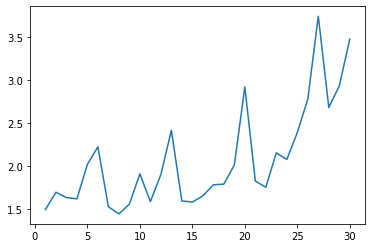

In [9]:
import matplotlib.pyplot as plt
plt.plot(df_n['np_su_nt']);